<a href="https://colab.research.google.com/github/medhhaa/Income-Prediction/blob/main/Income_Prediction_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Prediction


In [59]:
# Load imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [36]:
df = pd.read_csv('income.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Explore Data

In [5]:
df.education.value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [6]:
df.workclass.value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [7]:
df.occupation.value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


In [37]:
# One Hot Encoding: directly using get_dummies!
# Converting features into numerical values using One Hot Encoding

df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis = 1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis = 1)
df = df.drop('education', axis = 1)
df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis = 1)
df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis = 1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df.race).add_prefix('race_')], axis = 1)
df = pd.concat([df.drop('native-country', axis = 1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis = 1)
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False


In [38]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False


<Axes: >

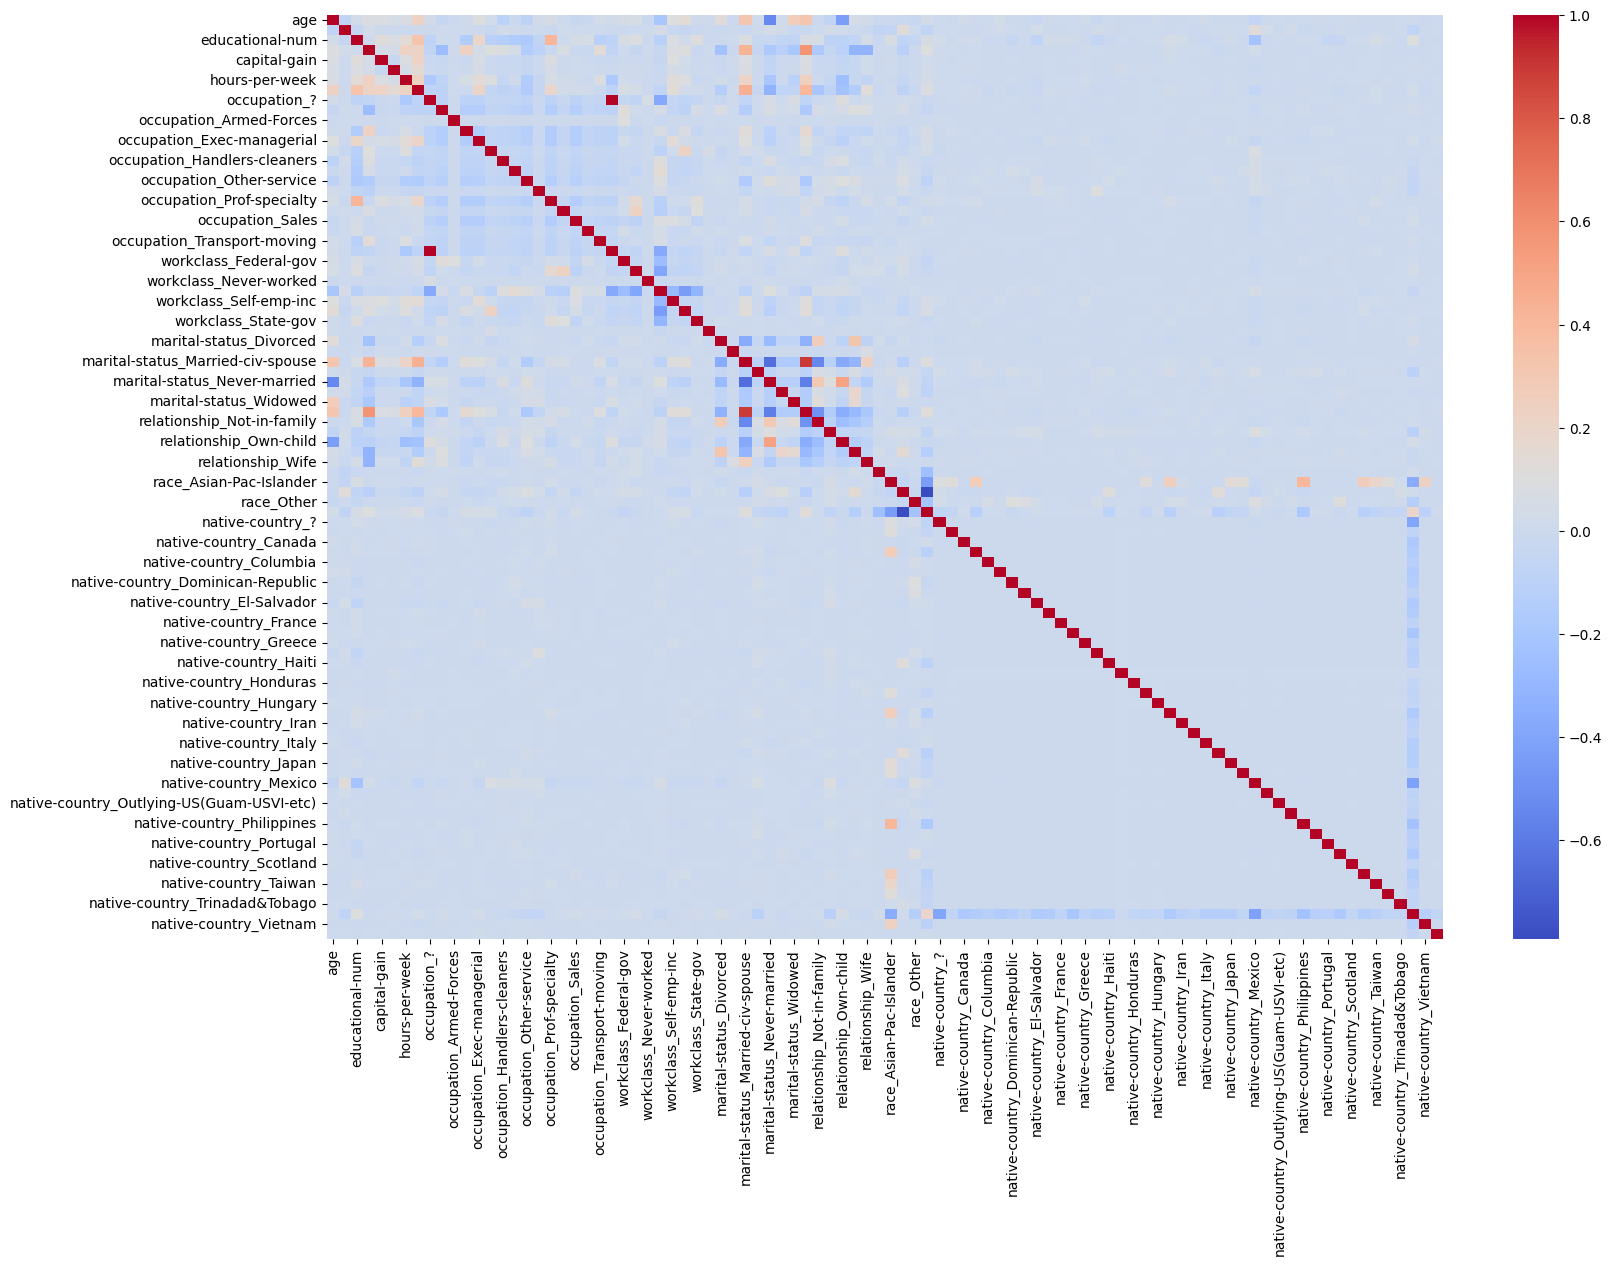

In [39]:
plt.figure(figsize = (18, 12))
sns.heatmap(df.corr(), annot = False, cmap = 'coolwarm')

In [45]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)
df_dropped.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

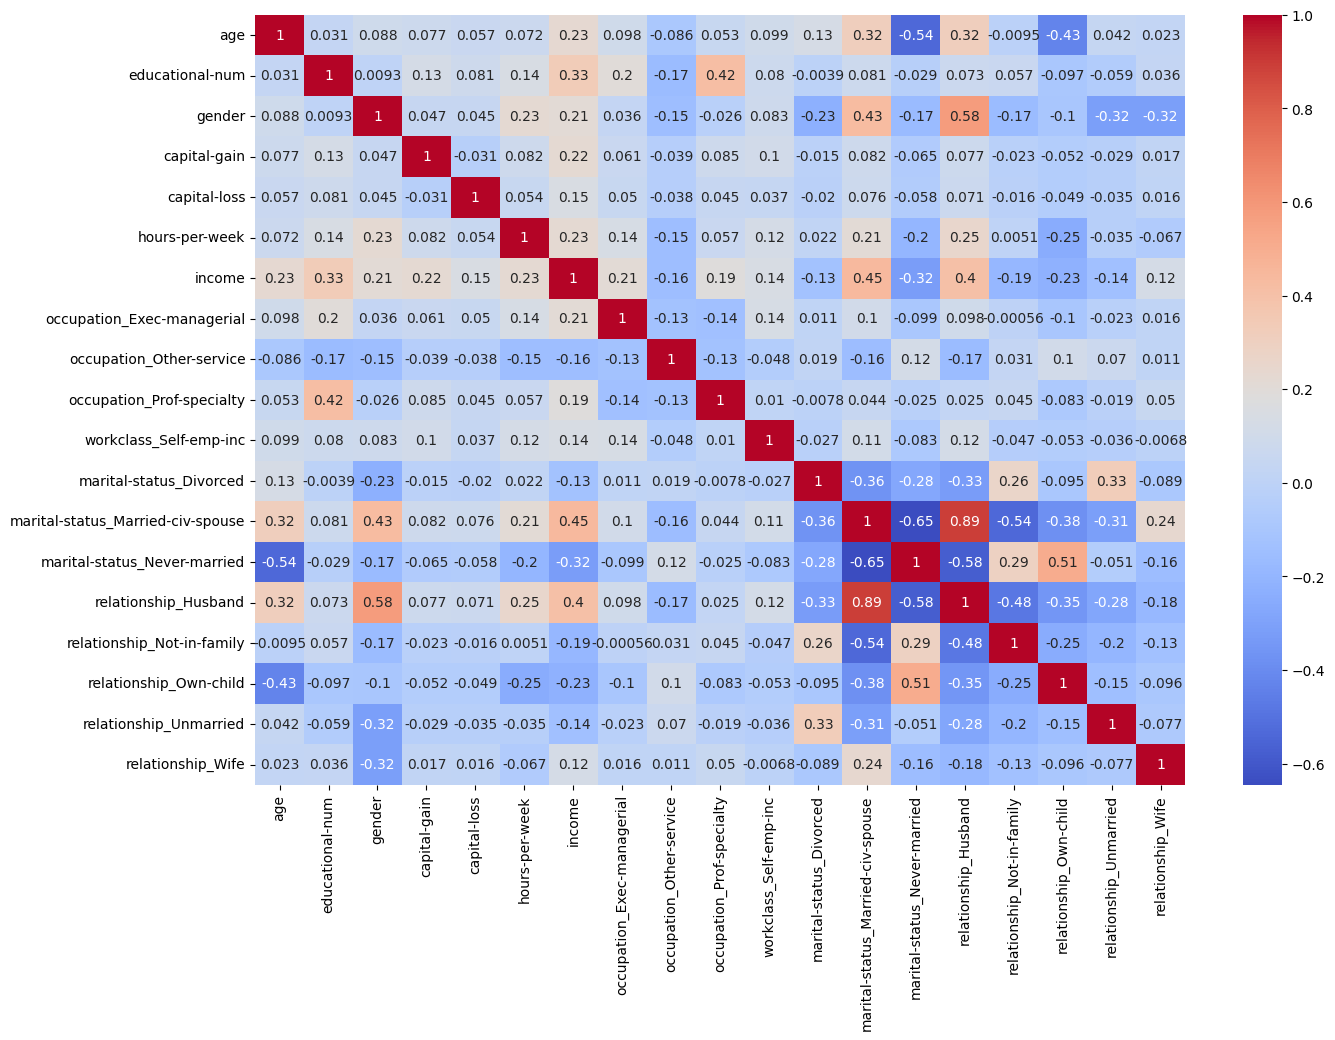

In [46]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_dropped.corr(), annot = True, cmap = 'coolwarm')

## Train Random Forest Model

In [49]:
# Nature of dataset: very decision like
# yes or no features
# Hence, choose Random Forest Decision Tree

# TODO: Split data into X and Y

train_df, test_df = train_test_split(df_dropped, test_size = 0.2, random_state = 42)

In [50]:
print(len(train_df))
print(len(test_df))

39073
9769


In [52]:
# Dependent Variable (Income)
# Independent Variable (All the other columns)
train_X = train_df.drop('income', axis = 1)
train_y = train_df.income

test_X = test_df.drop('income', axis = 1)
test_y = test_df.income

In [53]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [54]:
model.score(train_X, train_y)

0.9385765106339417

In [57]:
importances = dict(zip(model.feature_names_in_, model.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda item: item[1], reverse = True)}
importances

{'age': np.float64(0.23736465765446485),
 'educational-num': np.float64(0.1418504586067912),
 'capital-gain': np.float64(0.13750546685311946),
 'hours-per-week': np.float64(0.13463176684114958),
 'marital-status_Married-civ-spouse': np.float64(0.10727475035805413),
 'relationship_Husband': np.float64(0.060428120323744464),
 'capital-loss': np.float64(0.04910716889195557),
 'occupation_Exec-managerial': np.float64(0.023398892686735635),
 'marital-status_Never-married': np.float64(0.02334670464210585),
 'occupation_Prof-specialty': np.float64(0.020593583626301294),
 'gender': np.float64(0.011628277799142692),
 'relationship_Wife': np.float64(0.010912220490537538),
 'relationship_Not-in-family': np.float64(0.008783644482000263),
 'workclass_Self-emp-inc': np.float64(0.008311515695084412),
 'occupation_Other-service': np.float64(0.007924606505677235),
 'marital-status_Divorced': np.float64(0.00736405166204683),
 'relationship_Own-child': np.float64(0.006570618836086504),
 'relationship_Unm

TODO: Inference

## Hyperparameter Tuning

In [60]:
# Try all combinations

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 10)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.847 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.852 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.852 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [61]:
model_tuned = grid_search.best_estimator_

In [62]:
model_tuned.score(train_X, train_y)

0.8667110280756533

In [63]:
importances = dict(zip(model_tuned.feature_names_in_, model_tuned.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda item: item[1], reverse = True)}
importances

{'capital-gain': np.float64(0.19651493164342815),
 'marital-status_Married-civ-spouse': np.float64(0.19525156864522755),
 'educational-num': np.float64(0.1709447023825924),
 'relationship_Husband': np.float64(0.10097860929476637),
 'age': np.float64(0.06611013603077275),
 'capital-loss': np.float64(0.054196184978465824),
 'hours-per-week': np.float64(0.052455492543890064),
 'marital-status_Never-married': np.float64(0.04008155885912525),
 'occupation_Exec-managerial': np.float64(0.02873231201219596),
 'occupation_Prof-specialty': np.float64(0.02706901375272094),
 'relationship_Wife': np.float64(0.01607452019696715),
 'gender': np.float64(0.010952327092013532),
 'relationship_Not-in-family': np.float64(0.010183684784665867),
 'relationship_Own-child': np.float64(0.008904946195696265),
 'marital-status_Divorced': np.float64(0.007772539059695713),
 'occupation_Other-service': np.float64(0.006497653696317277),
 'workclass_Self-emp-inc': np.float64(0.004163617940613471),
 'relationship_Unma